# SET UP

In [12]:
import qiskit
from qiskit import IBMQ
from api_keys import IBM_QUANTUM_COMPUTER_TOKEN #This contains the necessary IBMQ token given to me by IBM. It is being imported from an unloaded file on github to ensure security

In [10]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [8]:
IBMQ.save_account(IBM_QUANTUM_COMPUTER_TOKEN)

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# HELLO QUANTUM WORLD

In [13]:
from qiskit import *

In [16]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [21]:
circuit = QuantumCircuit(qr, cr)

In [22]:
%matplotlib inline

In [23]:
circuit.draw()

q2_0: 
      
q2_1: 
      
c0: 2/

In [24]:
circuit.h(qr[0])

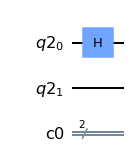

In [26]:
circuit.draw(output='mpl')

In [28]:
circuit.cx(qr[0], qr[1])

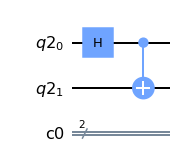

In [29]:
circuit.draw(output='mpl')

In [30]:
circuit.measure(qr, cr)

In [58]:
circuit.draw(initial_state=True, cregbundle=False)

┌───┐     ┌─┐   
q2_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q2_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

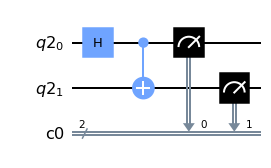

In [32]:
circuit.draw(output='mpl')

In [33]:
simulator = Aer.get_backend('qasm_simulator')

In [35]:
result = execute(circuit, backend= simulator).result()

In [38]:
from qiskit.tools.visualization import plot_histogram

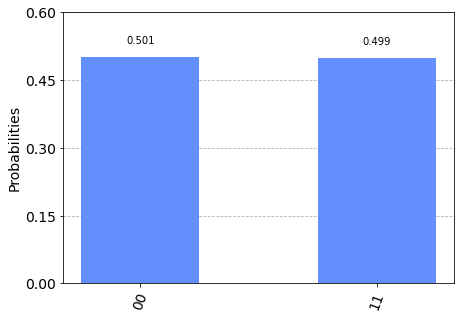

In [39]:
plot_histogram(result.get_counts(circuit))

In [40]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-03 13:41:24,253: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
provider = IBMQ.get_provider('ibm-q')

In [60]:
# Get backends
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

ibmqfactory.load_account:WARNING:2022-08-03 13:55:59,633: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [62]:
qcomp = provider.get_backend('ibmq_lima')

In [63]:
job = execute(circuit, backend=qcomp)

In [64]:
from qiskit.tools.monitor import job_monitor

In [66]:
job_monitor(job)

Job Status: job has successfully run


In [67]:
result = job.result()

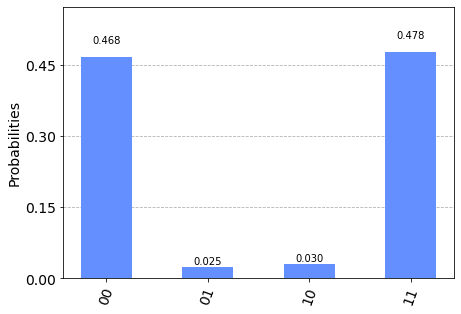

In [68]:
plot_histogram(result.get_counts(circuit))

In [69]:
circuit.draw()

┌───┐     ┌─┐   
q2_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q2_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

# Episode 4